In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products  = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

In [4]:
# Merge data for EDA
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

In [5]:
merged_data.drop(columns = 'Price_y',inplace = True)

In [6]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

## Customer Segmentation

# Data Preparation
# Aggregate customer-level data for clustering analysis.

In [10]:
# Derive Price column if missing
merged_data["Price"] = merged_data["TotalValue"] / merged_data["Quantity"]

# Aggregate customer-level data for clustering analysis
clustering_data = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending by each customer
    "Quantity": "sum",  # Total quantity purchased
    "Price": "mean"  # Average price of purchased products
}).reset_index()

In [11]:
clustering_data

,CustomerID,TotalValue,Quantity,Price
0,C0001,3354.52,12,278.334000
1,C0002,1862.74,10,208.920000
2,C0003,2725.38,14,195.707500
3,C0004,5354.88,23,240.636250
4,C0005,2034.24,7,291.603333
...,...,...,...,...
194,C0196,4982.88,12,416.992500
195,C0197,1928.65,9,227.056667
196,C0198,931.83,3,239.705000
197,C0199,1979.28,9,250.610000


In [14]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.drop("CustomerID", axis=1))

In [15]:
scaled_data

array([[-6.17014282e-02, -1.22032964e-01,  9.46702248e-02],
       [-8.77743532e-01, -4.48000209e-01, -9.04015921e-01],
       [-4.05857221e-01,  2.03934282e-01, -1.09410928e+00],
       [ 1.03254704e+00,  1.67078689e+00, -4.47701928e-01],
       [-7.83928612e-01, -9.36951078e-01,  2.85581271e-01],
       [ 4.15879421e-01, -1.22032964e-01,  8.67287344e-01],
       [-4.85482293e-01, -7.73967455e-01,  1.12604452e+00],
       [ 4.39970436e-01,  1.18183602e+00, -5.84040413e-01],
       [-1.40630171e+00, -1.58888557e+00,  3.89602086e-01],
       [-9.57166204e-01, -1.22032964e-01, -1.70467406e+00],
       [ 1.43695808e-01,  4.09506590e-02,  3.00323548e-01],
       [ 9.64923716e-01,  1.01885240e+00, -1.37449092e-02],
       [ 1.38575064e+00,  8.55868773e-01,  7.05501167e-01],
       [-1.72239508e+00, -1.75186919e+00, -1.61748649e+00],
       [-1.26353893e+00, -1.42590195e+00,  1.20905974e+00],
       [ 2.22697270e-01, -4.48000209e-01,  1.72067526e+00],
       [ 7.03751732e-01,  1.34481964e+00

In [16]:
# Clustering using KMeans
# Initialize and fit the KMeans model with 4 clusters (adjustable based on data exploration).
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [17]:
# Add Cluster Labels
clustering_data["Cluster"] = clusters

In [18]:
# Davies-Bouldin Index
# Evaluate the quality of clustering using the Davies-Bouldin Index (lower values indicate better clustering).
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.12180191226693


In [19]:
# Analyzing Cluster Characteristics
# Aggregate metrics for each cluster to understand customer segmentation.
cluster_analysis = clustering_data.groupby("Cluster").agg({
    "TotalValue": ["mean", "sum"],
    "Quantity": ["mean", "sum"],
    "Price": ["mean"]
}).reset_index()
print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
  Cluster   TotalValue              Quantity            Price
                  mean        sum       mean  sum        mean
0       0  4764.756279  204884.52  18.976744  816  248.966810
1       1  2777.735970  186108.31   8.805970  590  323.027698
2       2  1893.292203  111704.24   9.389831  554  201.215296
3       3  6243.283000  187298.49  19.233333  577  328.629939


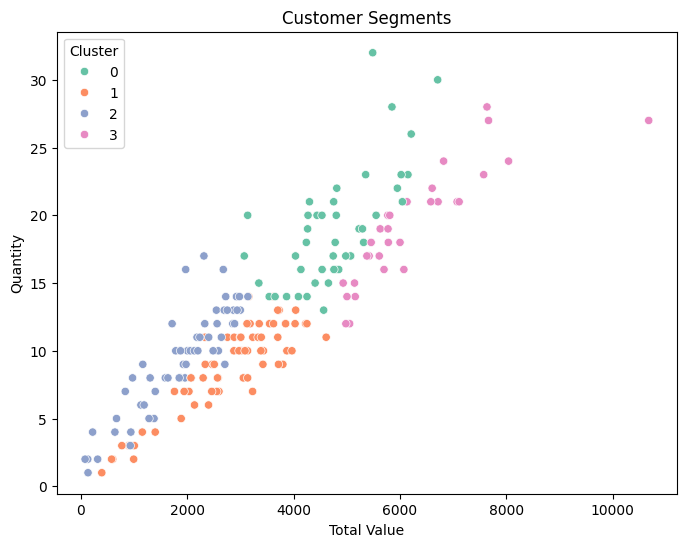

In [20]:
# Plot the clusters to visualize segmentation based on Total Value and Quantity.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data["TotalValue"], y=clustering_data["Quantity"], hue=clustering_data["Cluster"], palette="Set2")
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend(title="Cluster")
plt.show()

In [21]:
# Save Clustering Results
# Save the final clustering data with cluster labels to a CSV file for further analysis or visualization.
clustering_data.to_csv("FirstName_LastName_Clustering.csv", index=False)

# Explanation:
# - We used KMeans clustering to segment customers into 4 groups based on their total spending, quantity purchased, and average product price.
# - The data was normalized to ensure fair clustering across features with varying scales.
# - The Davies-Bouldin Index was calculated to evaluate the clustering quality, and a scatterplot visualized the clusters.
# - Cluster analysis provided insights into customer behavior within each segment, enabling targeted business strategies.
